In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np 
from sklearn.impute import SimpleImputer

In [21]:
#Before reading the file make sure to unprotect the Excel file 

df=pd.read_excel("C://Users//alexa//Downloads//MFH_regresion.xlsx")

In [22]:
# Creating dataframe, by choosing the columns that we need 

df_2=df[['scrssn','MFH','Daily_In_Org','Daily_Out_Org','Daily All Cost','dayssurvived',
         'gender','bathing_365','age','race','bladder_365','bowelincontinence_365','dressing_365','eating_365','grooming_365',
         'toileting_365','transferring_365','walking_365']]
df_2

,scrssn,MFH,Daily_In_Org,Daily_Out_Org,Daily All Cost,dayssurvived,gender,bathing_365,age,race,bladder_365,bowelincontinence_365,dressing_365,eating_365,grooming_365,toileting_365,transferring_365,walking_365
0,11023.0,0,0.000000,303.0735,303.073500,NaN,M,0.66,88.0,B,0.53,0.48,0.58,0.53,0.55,0.59,0.52,0.63
1,14506.0,0,35.459768,180.7497,216.209468,1342.0,M,0.65,64.0,W,0.51,0.36,0.56,0.48,0.55,0.52,0.45,0.55
2,33886.0,0,0.000000,249.4713,249.471300,753.0,M,0.67,71.0,B,0.51,0.55,0.78,0.52,0.67,0.58,0.62,0.73
3,126312.0,0,55.373062,49.8086,105.181662,1329.0,M,0.52,71.0,W,0.43,0.29,0.56,0.43,0.39,0.41,0.39,0.52
4,164326.0,0,84.782131,36.2897,121.071831,549.0,M,0.67,81.0,B,0.46,0.45,0.69,0.53,0.60,0.55,0.67,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39134,NaN,0,18.315015,357.5210,375.836015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39135,NaN,0,23.719734,18.8993,42.619034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39136,NaN,0,440.160312,225.5968,665.757112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39137,NaN,0,3.269233,101.3723,104.641533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# The race columns has A,B and Unkonwn, so we replace it with C category as the question state

df_2[['race']] = df_2[['race']].fillna('C')

# The scrssn and dayssurvived have NaN, so we replace it with Zero
df_2[["scrssn","dayssurvived"]] = df_2[["scrssn","dayssurvived"]].fillna(0)

# Removing the 0 rows from dataset as the the question state 
df_2 = df_2[df.Daily_In_Org != 0]

# Remove any Missing scressn from the dataset as the question state
df_2 = df_2[df.scrssn != 0]

# Remove any duplicate scressn from the dataset as the question state

df_2.drop_duplicates(subset=['scrssn'])

df_2.shape

C:\Users\alexa\AppData\Local\Temp/ipykernel_12928/3201008543.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2 = df_2[df.Daily_In_Org != 0]
C:\Users\alexa\AppData\Local\Temp/ipykernel_12928/3201008543.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2 = df_2[df.scrssn != 0]


(16004, 18)

In [27]:
# drop the missing values from genders and age 

df_2=df_2.dropna(subset=['gender','age'])
                 
                 
df_2.shape

(16004, 18)

In [28]:
#binarize the gender column

df_2['gender']=df_2['gender'].astype('category')
df_2['gender']=df_2['gender'].cat.codes 
df_2['gender']

1        1
3        1
4        1
5        1
6        1
        ..
27610    1
27612    1
27613    1
27616    1
27619    1
Name: gender, Length: 16004, dtype: int8

In [29]:
# Removing scrssn column from the dataframe 

df_2=df_2.drop(columns=['scrssn'])

In [30]:
#Creat dummies categories for race column as the question state 

df_2=pd.get_dummies(df_2, columns=['race'], drop_first=True)
df_2

,MFH,Daily_In_Org,Daily_Out_Org,Daily All Cost,dayssurvived,gender,bathing_365,age,bladder_365,bowelincontinence_365,dressing_365,eating_365,grooming_365,toileting_365,transferring_365,walking_365,race_B,race_C,race_W
1,0,35.459768,180.7497,216.209468,1342.0,1,0.65,64.0,0.51,0.36,0.56,0.48,0.55,0.52,0.45,0.55,0,0,1
3,0,55.373062,49.8086,105.181662,1329.0,1,0.52,71.0,0.43,0.29,0.56,0.43,0.39,0.41,0.39,0.52,0,0,1
4,0,84.782131,36.2897,121.071831,549.0,1,0.67,81.0,0.46,0.45,0.69,0.53,0.60,0.55,0.67,0.71,1,0,0
5,0,335.244484,207.6291,542.873584,0.0,1,0.37,77.0,0.22,0.12,0.39,0.33,0.36,0.28,0.32,0.27,0,0,1
6,0,25.442052,73.1791,98.621152,2145.0,1,0.66,82.0,0.37,0.34,0.55,0.41,0.57,0.52,0.43,0.75,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27610,0,34.870864,57.6523,92.523164,0.0,1,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
27612,0,2.535445,14.3783,16.913745,0.0,1,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
27613,0,143.054859,77.3845,220.439359,0.0,1,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
27616,1,25.179536,0.0000,25.179536,0.0,1,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0


In [31]:
#Replace the missing value with average for the field 



imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df_2[['bathing_365','bladder_365','bowelincontinence_365','dressing_365','eating_365','grooming_365',
         'toileting_365','transferring_365','walking_365']])

df_2[['bathing_365','bladder_365','bowelincontinence_365','dressing_365',
          'eating_365','grooming_365','toileting_365','transferring_365','walking_365']]= imputer.transform(df_2[['bathing_365','bladder_365',
         'bowelincontinence_365','dressing_365','eating_365','grooming_365',
         'toileting_365','transferring_365','walking_365']])
df_2

,MFH,Daily_In_Org,Daily_Out_Org,Daily All Cost,dayssurvived,gender,bathing_365,age,bladder_365,bowelincontinence_365,dressing_365,eating_365,grooming_365,toileting_365,transferring_365,walking_365,race_B,race_C,race_W
1,0,35.459768,180.7497,216.209468,1342.0,1,0.6500,64.0,0.510000,0.360000,0.560000,0.480000,0.550000,0.520000,0.450000,0.550000,0,0,1
3,0,55.373062,49.8086,105.181662,1329.0,1,0.5200,71.0,0.430000,0.290000,0.560000,0.430000,0.390000,0.410000,0.390000,0.520000,0,0,1
4,0,84.782131,36.2897,121.071831,549.0,1,0.6700,81.0,0.460000,0.450000,0.690000,0.530000,0.600000,0.550000,0.670000,0.710000,1,0,0
5,0,335.244484,207.6291,542.873584,0.0,1,0.3700,77.0,0.220000,0.120000,0.390000,0.330000,0.360000,0.280000,0.320000,0.270000,0,0,1
6,0,25.442052,73.1791,98.621152,2145.0,1,0.6600,82.0,0.370000,0.340000,0.550000,0.410000,0.570000,0.520000,0.430000,0.750000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27610,0,34.870864,57.6523,92.523164,0.0,1,0.6077,56.0,0.397633,0.389721,0.565489,0.458347,0.537397,0.536716,0.501689,0.616336,0,1,0
27612,0,2.535445,14.3783,16.913745,0.0,1,0.6077,87.0,0.397633,0.389721,0.565489,0.458347,0.537397,0.536716,0.501689,0.616336,0,0,1
27613,0,143.054859,77.3845,220.439359,0.0,1,0.6077,79.0,0.397633,0.389721,0.565489,0.458347,0.537397,0.536716,0.501689,0.616336,0,0,1
27616,1,25.179536,0.0000,25.179536,0.0,1,0.6077,54.0,0.397633,0.389721,0.565489,0.458347,0.537397,0.536716,0.501689,0.616336,1,0,0


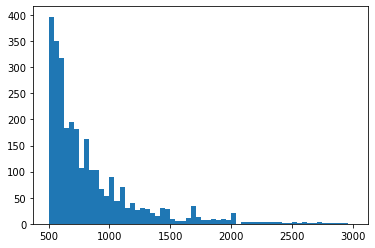

In [32]:
#checking normality for Dependent variable Daily All Cost

plt.hist(df_2['Daily All Cost'],60,range=[500, 3000], align='mid')
plt.show()

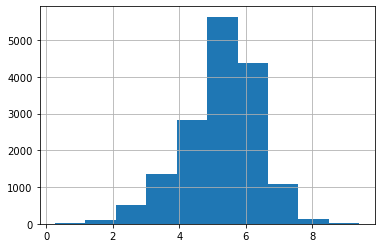

In [33]:
#checking normality for Dependent variable Daily All Cost after natural log applied 

log_trans=df_2['Daily All Cost'].transform(np.log)
log_trans.hist()
plt.show()

In [34]:
#Creating Dataframe variables  for Regression analysis 

y_trans =log_trans
x=df_2.drop(columns=['Daily All Cost'])

#Multiple linear Regression 

x = sm.add_constant(x)
model = sm.OLS(y_trans,x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Daily All Cost   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     1536.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:47:52   Log-Likelihood:                -16319.
No. Observations:               16004   AIC:                         3.268e+04
Df Residuals:                   15985   BIC:                         3.282e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.56

C:\Users\alexa\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
